In [1]:
# Acquire weather data for various hikes and analyze it

In [19]:
# Import relevant libaries
import json, requests, regex, csv, pandas as pd, matplotlib.pyplot as plt

In [3]:
# Allow users to enter their own hikes and coordinates
coord_dct = {}
while True:
    print("Please enter the name of the hike.")
    hike_name = input()
    while True:
        print(
            "Please enter the latitude and longitude coordinates of the hike.\nYou can use https://www.google.com/maps to find the coordinates."
        )
        hike_coord = input()
        if regex.search(r"^\d{1,2}.\d{4,},\s*-{,1}\d{1,3}.\d{4,}$", hike_coord):
            break
    coord_dct[hike_name] = (
        hike_coord.split(",")[0] + "," + hike_coord.split(",")[1].replace(" ", "")
    )
    while True:
        print('Do you want to enter another hike? Please enter "yes" or "no".')
        answer = input()
        if answer in ["yes", "no"]:
            break
    if answer == "no":
        break

Please enter the name of the hike.
Eagle Rock
Please enter the latitude and longitude coordinates of the hike.
You can use https://www.google.com/maps to find the coordinates.
39.08565949800588, -78.51014584935207
Do you want to enter another hike? Please enter "yes" or "no".
yes
Please enter the name of the hike.
Trumbo Hollow
Please enter the latitude and longitude coordinates of the hike.
You can use https://www.google.com/maps to find the coordinates.
38.907734049434666, -78.05476200517448
Do you want to enter another hike? Please enter "yes" or "no".
yes
Please enter the name of the hike.
Bear Church Rock
Please enter the latitude and longitude coordinates of the hike.
You can use https://www.google.com/maps to find the coordinates.
38.45021052339993, -78.39725377787227
Do you want to enter another hike? Please enter "yes" or "no".
no


In [4]:
# Download the forecast links from the National Weather Service's API using the coord_lst
fc_links = {}
for h in coord_dct:
    try:
        response = requests.get("https://api.weather.gov/points/" + coord_dct[h])
        response.raise_for_status()
        data = json.loads(response.text)
        fc_links[h] = data["properties"]["forecast"]
    except:
        print(f"There was an error with {h}.")

In [8]:
header = [
    "hikeName",
    "time",
    "temperature",
    "probabilityOfPrecipitation",
    "windSpeed",
    "detailedForecast",
]

In [11]:
# Create new csv
with open("weatherforHikes.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    f.close()

In [12]:
# Write 9 periods of each forecast for each hike to csv
for l in fc_links:
    try:
        r2 = requests.get(fc_links[l])
        r2.raise_for_status()
        d2 = json.loads(r2.text)
        i = 0
        while i < 9:
            with open("weatherforHikes.csv", "a", newline="\n") as f:
                writer = csv.writer(f)
                writer.writerow(
                    [
                        l,
                        d2["properties"]["periods"][i]["name"],
                        d2["properties"]["periods"][i]["temperature"],
                        d2["properties"]["periods"][i]["probabilityOfPrecipitation"][
                            "value"
                        ],
                        d2["properties"]["periods"][i]["windSpeed"]
                        + " "
                        + d2["properties"]["periods"][i]["windDirection"],
                        d2["properties"]["periods"][i]["detailedForecast"],
                    ]
                )
                f.close()
            i += 1
    except:
        print(f"There was an error with {l}.")
    print("\n")

In [13]:
# Import csv into dataframe
df = pd.read_csv("weatherforHikes.csv")

In [14]:
df

,hikeName,time,temperature,probabilityOfPrecipitation,windSpeed,detailedForecast
0,Eagle Rock,This Afternoon,90,NaN,6 mph S,"Sunny, with a high near 90. South wind around ..."
1,Eagle Rock,Tonight,64,NaN,6 mph SW,"Mostly clear, with a low around 64. Southwest ..."
2,Eagle Rock,Monday,89,NaN,5 to 10 mph NW,"Partly sunny, with a high near 89. Northwest w..."
3,Eagle Rock,Monday Night,66,NaN,6 to 10 mph N,"Mostly cloudy, with a low around 66. North win..."
4,Eagle Rock,Tuesday,83,NaN,10 mph N,"Partly sunny, with a high near 83. North wind ..."
5,Eagle Rock,Tuesday Night,61,NaN,6 to 12 mph NE,"Mostly cloudy, with a low around 61."
6,Eagle Rock,Wednesday,79,NaN,5 to 8 mph E,"Mostly sunny, with a high near 79."
7,Eagle Rock,Wednesday Night,62,NaN,8 mph SE,A slight chance of rain showers after 8pm. Par...
8,Eagle Rock,Thursday,82,30.0,8 to 12 mph S,"A slight chance of rain showers before 2pm, th..."
9,Trumbo Hollow,This Afternoon,93,NaN,7 mph S,"Sunny, with a high near 93. South wind around ..."


In [46]:
df.fillna(0, inplace=True)

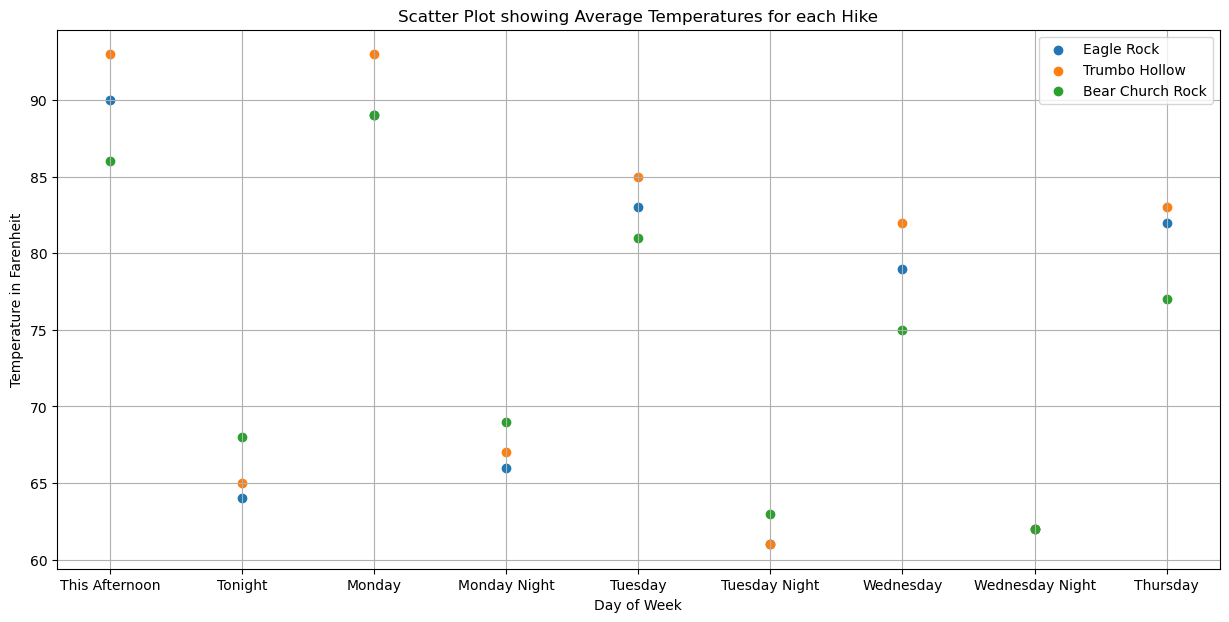

In [42]:
# the below visulizations will only work with certain hike names
plt.figure(figsize=(15, 7))
plt.scatter(
    df[df["hikeName"] == "Eagle Rock"]["time"],
    df[df["hikeName"] == "Eagle Rock"]["temperature"],
    label="Eagle Rock",
)
plt.scatter(
    df[df["hikeName"] == "Trumbo Hollow"]["time"],
    df[df["hikeName"] == "Trumbo Hollow"]["temperature"],
    label="Trumbo Hollow",
)
plt.scatter(
    df[df["hikeName"] == "Bear Church Rock"]["time"],
    df[df["hikeName"] == "Bear Church Rock"]["temperature"],
    label="Bear Church Rock",
)
plt.grid()
plt.title("Scatter Plot showing Average Temperatures for each Hike")
plt.xlabel("Day of Week")
plt.ylabel("Temperature in Farenheit")
plt.legend()
plt.show()

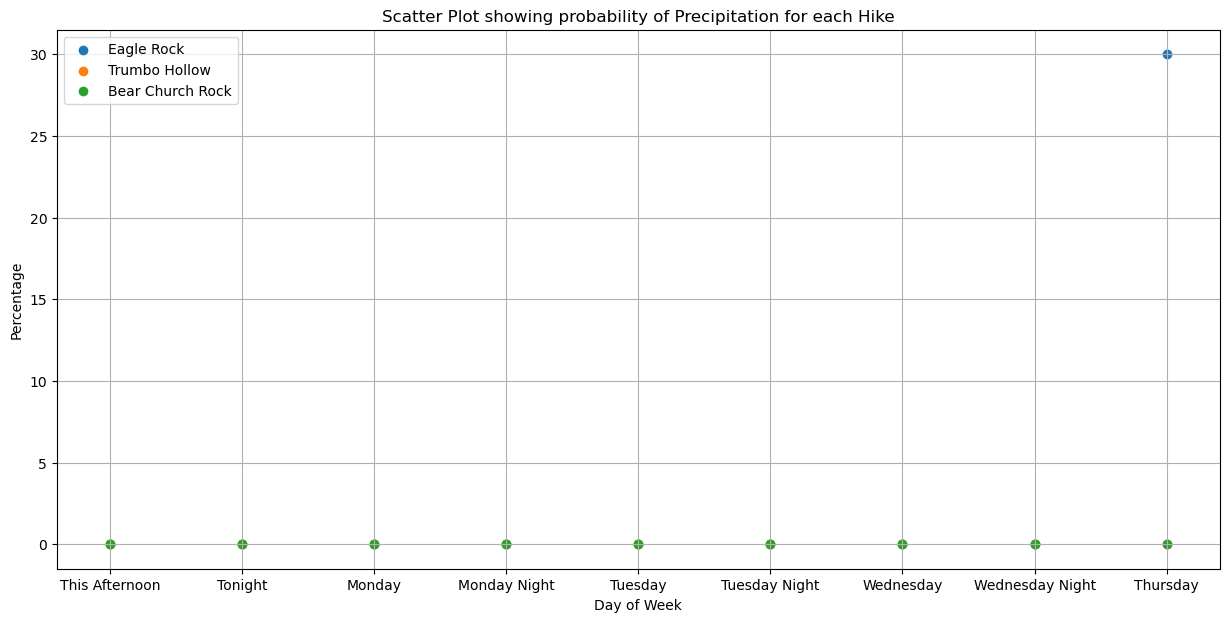

In [49]:
plt.figure(figsize=(15, 7))
plt.scatter(
    df[df["hikeName"] == "Eagle Rock"]["time"],
    df[df["hikeName"] == "Eagle Rock"]["probabilityOfPrecipitation"],
    label="Eagle Rock",
)
plt.scatter(
    df[df["hikeName"] == "Trumbo Hollow"]["time"],
    df[df["hikeName"] == "Trumbo Hollow"]["probabilityOfPrecipitation"],
    label="Trumbo Hollow",
)
plt.scatter(
    df[df["hikeName"] == "Bear Church Rock"]["time"],
    df[df["hikeName"] == "Bear Church Rock"]["probabilityOfPrecipitation"],
    label="Bear Church Rock",
)
plt.grid()
plt.title("Scatter Plot showing probability of Precipitation for each Hike")
plt.xlabel("Day of Week")
plt.ylabel("Percentage")
plt.legend()
plt.show()